In [46]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

In [47]:
dT = 0.001
dL = 1
T = 100
L = 2000
NT = int(T/dT)
NL = int(L/dL)

In [48]:
theta = np.random.uniform(0, 2*np.pi, (NT, NL))
phi = np.random.uniform(0, 2*np.pi, (NT, NL))

theta = np.array(theta, dtype=np.float32)
phi = np.array(theta, dtype=np.float32)

theta_prime = theta.copy()
phi_prime = phi.copy()

theta_prime[0, NL//2] += 1e-3

Sx = np.sin(theta)*np.cos(phi)
Sy = np.sin(theta)*np.sin(phi)
Sz = np.cos(theta)

Sx_prime = np.sin(theta_prime)*np.cos(phi_prime)
Sy_prime = np.sin(theta_prime)*np.sin(phi_prime)
Sz_prime = np.cos(theta_prime)

# print(Sx)
# print(Sy)
# print(Sx)

# print('######################')

# print(Sx_prime)
# print(Sy_prime)
# print(Sz_prime)

# print('######################')

# print(Sx**2 + Sy**2 + Sz**2)
# print(Sx_prime**2 + Sy_prime**2 + Sz_prime**2)


# $$dS_i^x = dt \times (S_i^y (S_{i-1}^z + S_{i+1}^z) - S_i^z (S_{i-1}^y + S_{i+1}^y))$$
# $$dS_i^y = dt \times (S_i^z (S_{i-1}^x + S_{i+1}^x) - S_i^x (S_{i-1}^z + S_{i+1}^z))$$
# $$dS_i^z = dt \times (S_i^x (S_{i-1}^y + S_{i+1}^y) - S_i^y (S_{i-1}^x + S_{i+1}^x))$$



In [49]:
def evolve(sx, sy, sz, NT):

    for ti in trange(NT-1):
        
        ti = ti + 1
        
        s_iminus1_z = np.roll(sz[ti-1], 1)
        s_iplus1_z = np.roll(sz[ti-1], -1)
        s_iminus1_y = np.roll(sy[ti-1], 1)
        s_iplus1_y = np.roll(sy[ti-1], -1)
        s_iminus1_x = np.roll(sx[ti-1], 1)
        s_iplus1_x = np.roll(sx[ti-1], -1)
        
        dsx = dT * (sy[ti-1] * (s_iminus1_z + s_iplus1_z) - sz[ti-1] * (s_iminus1_y + s_iplus1_y))
        dsy = dT * (sz[ti-1] * (s_iminus1_x + s_iplus1_x) - sx[ti-1] * (s_iminus1_z + s_iplus1_z))
        dsz = dT * (sx[ti-1] * (s_iminus1_y + s_iplus1_y) - sy[ti-1] * (s_iminus1_x + s_iplus1_x))
    
        sx[ti] = sx[ti-1] + dsx
        sy[ti] = sy[ti-1] + dsy
        sz[ti] = sz[ti-1] + dsz
        
#         norm = np.sqrt(sx[ti]**2 + sy[ti]**2 + sz[ti]**2)
        
#         sx[ti] /= norm
#         sy[ti] /= norm
#         sz[ti] /= norm
        
        # print('###################################')
        # print(sx**2 + sy**2 + sz**2)
        # print(ti)
        
    return sx, sy, sz

In [50]:
x, y, z = evolve(Sx, Sy, Sz, NT)

100%|███████████████████████████████████| 99999/99999 [00:41<00:00, 2436.07it/s]


In [43]:
x

array([[ 0.37568   ,  0.4849964 , -0.21890958, ..., -0.49104157,
         0.19068609,  0.4970662 ],
       [ 0.37724856,  0.4835928 , -0.2178789 , ..., -0.49128723,
         0.18990791,  0.49667382],
       [ 0.37881708,  0.48218784, -0.2168469 , ..., -0.49153143,
         0.18912846,  0.49628213],
       ...,
       [-0.63525015, -0.68603927, -0.65288496, ..., -0.896459  ,
        -0.14424881, -0.4979861 ],
       [-0.6354295 , -0.6861205 , -0.6519358 , ..., -0.8957411 ,
        -0.14519313, -0.4974253 ],
       [-0.63560855, -0.6862025 , -0.6509859 , ..., -0.8950215 ,
        -0.14613879, -0.49686366]], dtype=float32)

In [44]:
y

array([[0.82994634, 0.6215668 , 0.05046847, ..., 0.40577602, 0.03778921,
        0.44591513],
       [0.82903063, 0.6223358 , 0.05077382, ..., 0.40633917, 0.03750619,
        0.4460541 ],
       [0.8281129 , 0.6231049 , 0.05107987, ..., 0.40690267, 0.03722377,
        0.4461941 ],
       ...,
       [0.8482518 , 0.6973142 , 0.07670107, ..., 0.06236343, 0.04545597,
        0.8301239 ],
       [0.8481123 , 0.69740355, 0.0768661 , ..., 0.06360338, 0.04397162,
        0.83034587],
       [0.84797305, 0.6974917 , 0.0770329 , ..., 0.06484365, 0.04248849,
        0.83056647]], dtype=float32)

100%|███████████████████████████████████| 99999/99999 [00:36<00:00, 2762.87it/s]


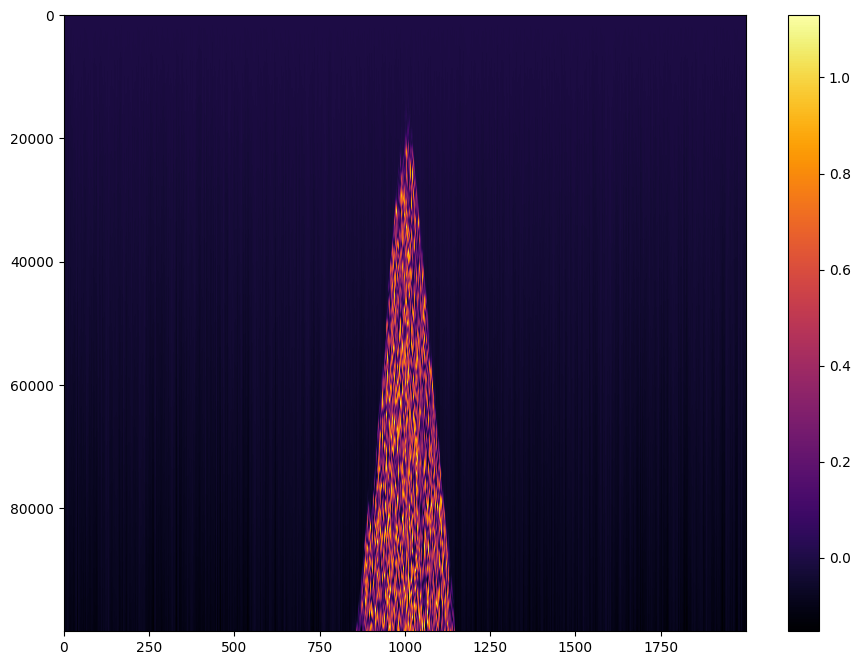

In [51]:
x_p, y_p, z_p = evolve(Sx_prime, Sy_prime, Sz_prime, NT)

d = 0.5*(1 - x*x_p - y*y_p - z*z_p)

plt.figure(figsize=(11, 8))
plt.imshow(d, aspect='auto', cmap='inferno')
plt.colorbar()